<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EA%B3%BC%EC%A0%9C/%ED%95%84%EC%88%983_%EC%9D%B4%EA%B0%80%EC%98%8141_0119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수과제 3
- 가장 많은 범죄가 발생하는 지역들과 적은 범죄가 발생하는 지역들을 확인하고
    - 확인할 부분은 위도 경도데이터와 범죄카운트, 범죄 type내용
    - 둘의 유의미한 차이가 있는지 분석하는 것

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('crime.csv')

In [ ]:
# 범죄 발생 지역별 분
crime_counts = df[df['IS_CRIME'] == 1].groupby(['GEO_LAT', 'GEO_LON', 'OFFENSE_TYPE_ID']).size().reset_index(name='COUNT')
# 범죄가 많이 발생한 지역 상위 10개
top_n = 10
top_crime_locations = crime_counts.nlargest(top_n, 'COUNT')

# 범죄가 적게 발생한 지역 하위 10개
bottom_n = 10
bottom_crime_locations = crime_counts.nsmallest(bottom_n, 'COUNT')


In [ ]:
# 상위 지역의 범죄 유형 분포
top_crime_types = top_crime_locations['OFFENSE_TYPE_ID'].value_counts()

# 하위 지역의 범죄 유형 분포
bottom_crime_types = bottom_crime_locations['OFFENSE_TYPE_ID'].value_counts()

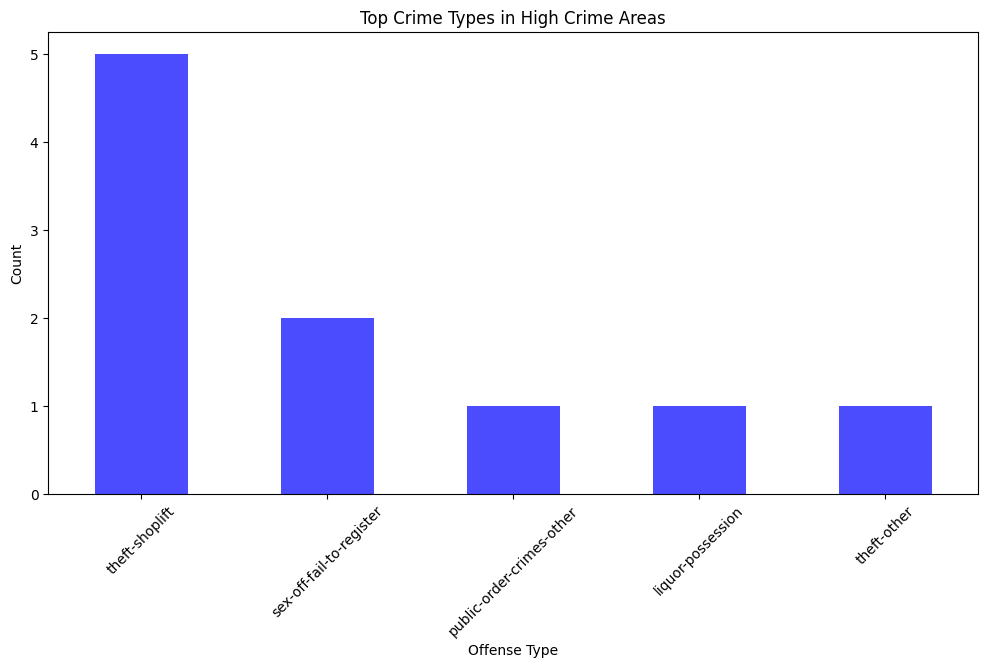

In [ ]:
# 상위 지역 범죄 유형 시각화
plt.figure(figsize=(12, 6))
top_crime_types.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top Crime Types in High Crime Areas')
plt.ylabel('Count')
plt.xlabel('Offense Type')
plt.xticks(rotation=45)
plt.show()


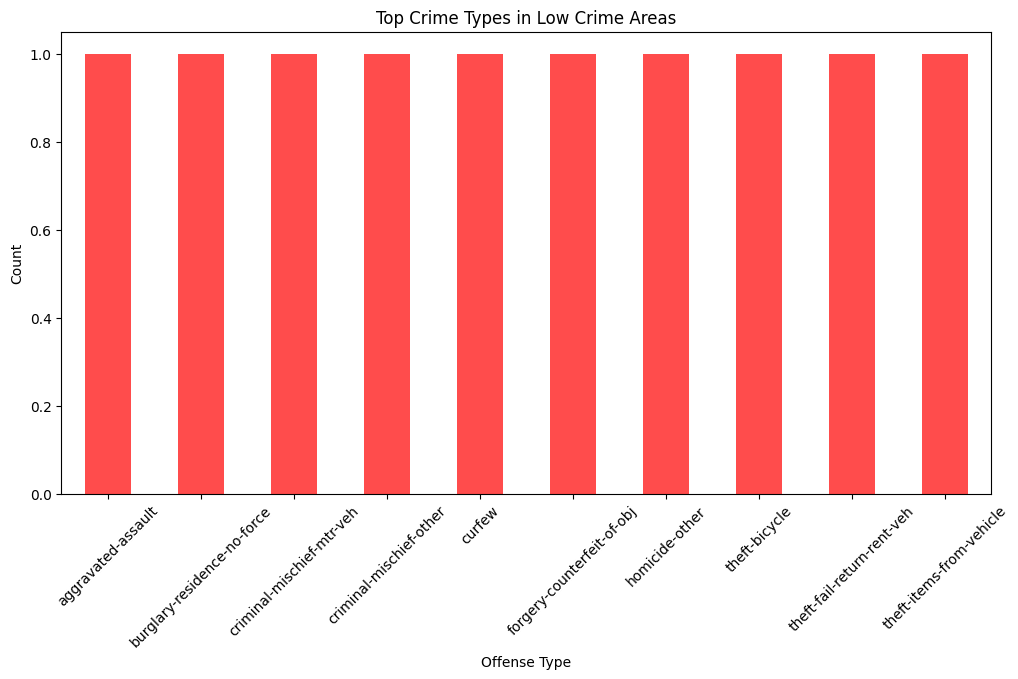

In [ ]:
# 하위 지역 범죄 유형 시각화
plt.figure(figsize=(12, 6))
bottom_crime_types.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top Crime Types in Low Crime Areas')
plt.ylabel('Count')
plt.xlabel('Offense Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 유의미한 차이 검정 (카이제곱 검정)

from scipy.stats import chi2_contingency

# 카이제곱 검정을 위한 데이터 준비
contingency_table = pd.DataFrame({
    'Top': top_crime_types.reindex(top_crime_types.index.union(bottom_crime_types.index), fill_value=0),
    'Bottom': bottom_crime_types.reindex(top_crime_types.index.union(bottom_crime_types.index), fill_value=0)
})

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}") # pvalue가 0.05보다 작아야유효한차이인데 훨씬 큼


Chi-squared: 20.0, p-value: 0.130141420882483
